#**Enhancing E-Commerce Growth through CRM Analysis: Data-Driven Insights into Customer Behavior**



### Objective:
The primary objective of this project is to leverage **Customer Relationship Management (CRM)** data to provide actionable insights into customer purchasing behavior, preferences, and engagement with an e-commerce platform. The analysis aims to help upper management understand key trends in customer transactions, identify valuable customer segments, and inform strategic decisions that will enhance **customer retention**, **boost sales**, and **optimize marketing efforts**.

### Approach:
1. **Data Preprocessing:**
   - Conduct thorough cleaning and refinement of the dataset, addressing **missing values**, **duplicates**, and **outliers** to ensure data integrity.
   - Prepare the dataset for analysis with an emphasis on customer transactions and engagement metrics.

2. **Exploratory Data Analysis (EDA):**
   - Perform detailed EDA to uncover hidden patterns, correlations, and anomalies in customer behavior.
   - Analyze trends in **purchasing frequency**, **spending patterns**, and **seasonal behavior** to understand how customers interact with the platform over time.

3. **Feature Engineering:**
   - Develop customer-centric features such as **Recency**, **Frequency**, and **Monetary (RFM)** values to segment customers based on their purchasing activity.
   - Create additional metrics such as **average days between purchases**, **preferred shopping hours**, and **peak days of engagement** to gain a holistic view of customer behavior.

4. **Customer Segmentation and RFM Scoring:**
   - Segment customers based on their RFM scores to identify key groups such as **loyal customers**, **at-risk customers**, and **high-value customers**.
   - Use segmentation to inform targeted marketing campaigns and personalized recommendations.

5. **Actionable Insights and Recommendations:**
   - Provide clear, data-driven insights on customer engagement patterns, shopping preferences, and retention risks.
   - Develop strategic recommendations for upper management, focusing on how to **increase customer retention**, **optimize promotional timing**, and **tailor marketing efforts** to different customer segments.


### Key Deliverables:
- **Customer Behavior Analysis:** Detailed breakdown of customer purchase patterns, peak engagement periods, and preferred shopping times.
- **Customer Segmentation:** RFM-based segmentation of customers into groups for targeted marketing and retention efforts.
- **Actionable Recommendations:** Strategies for boosting retention, improving customer loyalty, and increasing overall sales through targeted marketing and personalized offers.

### Expected Impact:
This CRM analysis is expected to deliver key insights into how customers interact with the e-commerce platform, providing management with a deeper understanding of their customer base. By leveraging the power of data, the project will enable the business to:
- **Improve customer retention rates** through targeted engagement.
- **Optimize marketing and sales strategies** by understanding customer preferences.
- **Enhance customer lifetime value (CLV)** through better customer segmentation and personalized offerings.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [ ]:
!gdown 1iLuBLghGAL_2_13OfzDqQmnC_kpyK-8e

Downloading...
From: https://drive.google.com/uc?id=1iLuBLghGAL_2_13OfzDqQmnC_kpyK-8e
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:01<00:00, 39.1MB/s]


In [ ]:
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding = 'unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Preprocessing

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


Insights :

Total Entries: The dataset contains 536,641 transactions.

Missing Values:

Description: 1,454 missing entries.
CustomerID: 135,037 missing entries (about 25% of the data).
Data Types:

InvoiceNo, StockCode, Description, Country: Object (categorical/text data).
Quantity: Integer (number of items purchased).
InvoiceDate: Object (requires conversion to datetime for analysis).
UnitPrice, CustomerID: Float (price and customer identification).
Key Columns:

CustomerID: Significant number of missing values, which might affect customer-based analysis.
InvoiceDate: Needs conversion to datetime format for time-based analysis.
Data Completeness:

High Completeness: Most columns have full data except for Description and CustomerID.

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


# Exploratory Data Analysis (EDA)


In [ ]:
# Outlier percentage

outlier_col = ['Quantity', 'UnitPrice', 'TotalSale']

for col in outlier_col:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)

  iqr = q3-q1

  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  print(f"Outlier percentage in {col} :",round((len(outliers)/ len(df)) * 100,2))


Outlier percentage in Quantity : 10.53
Outlier percentage in UnitPrice : 7.35
Outlier percentage in TotalSale : 8.03


In [ ]:
# Statistical Analysis

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSale,TotalRevenue
count,536641.000000,536641,536641.000000,401604.000000,536641.000000,536641.000000
mean,10.519172,2011-07-04 08:57:06.087421952,4.673883,15281.160818,19.830969,19.830969
min,0.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000,3.750000,3.750000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000,9.870000,9.870000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,17.400000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,168469.600000
std,156.036720,NaN,94.856938,1714.006089,268.715743,268.715743


### 1. **Quantity Sold**
- The average quantity sold per transaction is **10.52** units.
- The maximum quantity in a single transaction was **80,995** units, indicating potential bulk purchases.
- There's a significant **standard deviation (156)**, suggesting high variability in quantities sold.

### 2. **Invoice Date**
- The transactions span from **Dec 1, 2010** to **Dec 9, 2011**.
- The median transaction date falls around **July 19, 2011**, indicating most activity during mid-year.

### 3. **Unit Price**
- The average unit price is **$4.67**, with prices ranging from **$0 to $38,970**.
- High variance in prices (std dev **$94.86**) indicates a mix of high-end and low-end products.
  
### 4. **Customer Information**
- There are **401,604 unique customers** who made purchases.
- Customer IDs range from **12346 to 18287**, with no significant gaps.

### 5. **Total Sale & Revenue**
- The average total sale per invoice is **$19.83**.
- A maximum total sale of **$168,469.60** was recorded, showing a significant range in transaction sizes.
- There is a high standard deviation (**$268.71**), which suggests a few high-value transactions are inflating the mean.

In [ ]:
df.describe(include = ['object', 'category'])

,InvoiceNo,StockCode,Description,Country,Month,Day,Year
count,536641,536641,535187,536641,536641,536641,536641
unique,25900,4070,4223,38,12,31,2
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,11,8,2011
freq,1114,2301,2357,490300,83343,24421,494660


### 1. **Invoice Numbers**
- There are **25,900 unique invoices** recorded across **536,641 transactions**.
- The most frequent invoice number is **573585**, appearing **1,114 times**, suggesting multiple orders from the same buyer or batch processing.

### 2. **Stock Codes & Product Description**
- **4,070 unique stock codes** represent the variety of products sold.
- The most sold product is the **"WHITE HANGING HEART T-LIGHT HOLDER"** (StockCode: **85123A**), sold **2,357 times**.

### 3. **Countries**
- Transactions span across **38 countries**, with **United Kingdom** being the largest market, accounting for **490,300 transactions** (~91% of total).

### 4. **Time (Month, Day, Year)**
- Most transactions occurred in **November (83,343)**, indicating higher sales, possibly due to the holiday season.
- The **8th day** of the month was the busiest, with **24,421 transactions**.
- Most transactions occurred in the year **2011**, which had **494,660 transactions** (~92%).

In [ ]:
df['Quantity'] = df['Quantity'].apply(lambda x: 0 if x<0 else x)

In [ ]:
df['UnitPrice'] = np.where(df['UnitPrice'] < 0, 0, df['UnitPrice'])

In [ ]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['Day'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year

cat_col = ['Month', 'Day', 'Year']
for col in cat_col:
  df[col] = df[col].astype("category")



In [ ]:
cat_col = ['Country', 'Month', 'Day', 'Year']

for col in cat_col:
  print(f"Unique values in {col}:", df[col].unique())
  print()

Unique values in Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Unique values in Month: [12, 1, 2, 3, 4, ..., 7, 8, 9, 10, 11]
Length: 12
Categories (12, int32): [1, 2, 3, 4, ..., 9, 10, 11, 12]

Unique values in Day: [1, 2, 3, 5, 6, ..., 27, 28, 30, 31, 29]
Length: 31
Categories (31, int32): [1, 2, 3, 4, ..., 28, 29, 30, 31]

Unique values in Year: [2010, 2011]
Categories (2, int32): [2010, 2011]



# Univariate Analysis

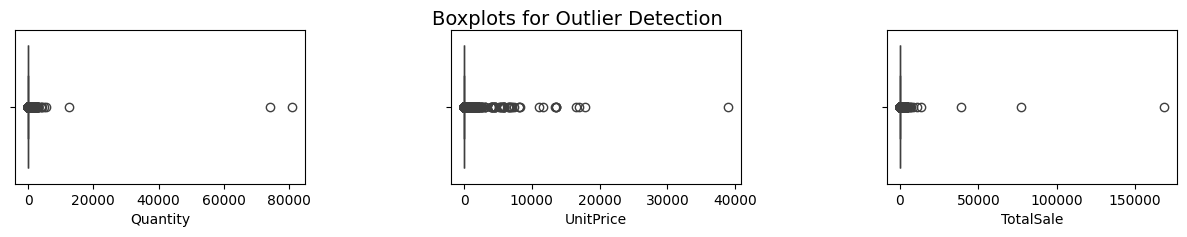

In [ ]:
# Boxplot for outliers

plt.figure(figsize = (15,2))

grid = plt.GridSpec(1,3, wspace = 0.5, hspace = 0.4)

for i, col in enumerate(['Quantity', 'UnitPrice', 'TotalSale']): # visualize graphs
  ax = plt.subplot(grid[i]) # Use GridSpec for subplot positioning
  sns.boxplot(x = df[col], ax = ax)

plt.suptitle('Boxplots for Outlier Detection', fontsize=14)
plt.show()

Insights :
1. **Quantity**:
   - Extreme outliers with values above **80,000**.
   - Most transactions involve much lower quantities, indicating possible bulk orders or errors.

2. **UnitPrice**:
   - Outliers reach up to **40,000**, suggesting high-priced items or data issues.
   - Majority of items are low-cost, as prices are clustered at the lower end.

3. **TotalSale**:
   - Large outliers with sales reaching **150,000**.
   - Most transactions have smaller totals, with outliers indicating bulk purchases or anomalies.

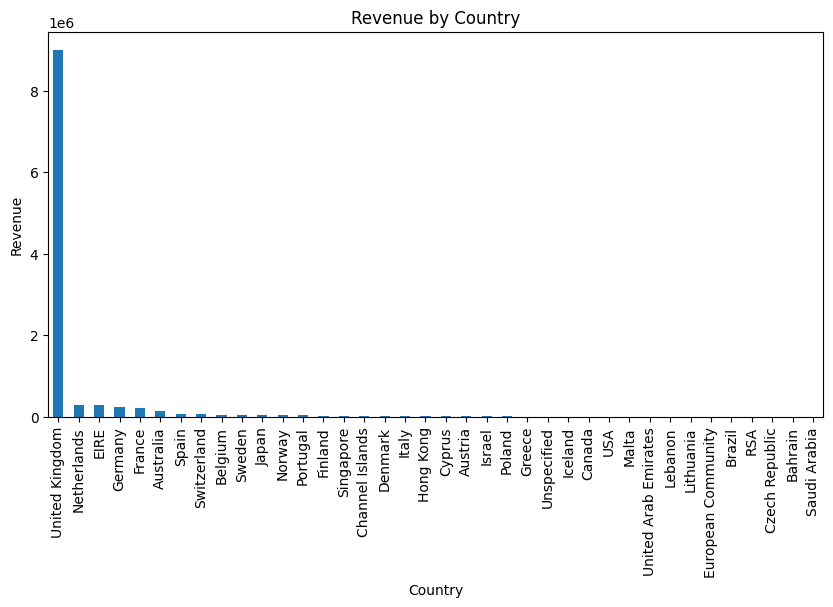

In [ ]:
plt.figure(figsize = (13,4))
country_revenue = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
country_revenue.plot(kind='bar', figsize=(10,5))
plt.title('Revenue by Country')
plt.ylabel('Revenue')
plt.savefig('revenue_by_country.png', bbox_inches='tight')
plt.show()


Insights :
- The **United Kingdom** dominates in revenue, contributing more than **8 million**, far surpassing other countries.
- Countries like the **Netherlands, Germany, France, and Australia** show minor contributions in comparison, suggesting heavy reliance on the UK market.

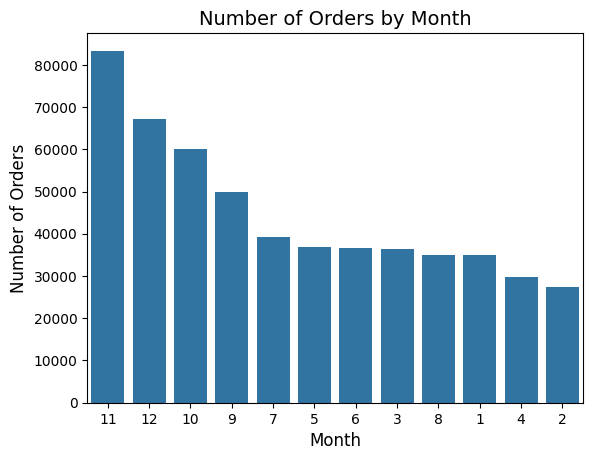

In [ ]:
order_month = df['Month'].value_counts(ascending = False).index
sns.countplot(x = df['Month'], order = order_month)
plt.title('Number of Orders by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.savefig('Monthly_order.png', bbox_inches='tight')
plt.show()

#### Number of Orders by Month Insights:
- **Peak Month:** November has the highest number of orders, exceeding **80,000**. This suggests high activity during the holiday shopping season.
- **Steady Decline:** After November and December, there is a steady decline in the number of orders, with the lowest numbers observed in February.
- **Lowest Months:** February and April show the least number of orders, indicating possible seasonality in purchasing behavior.

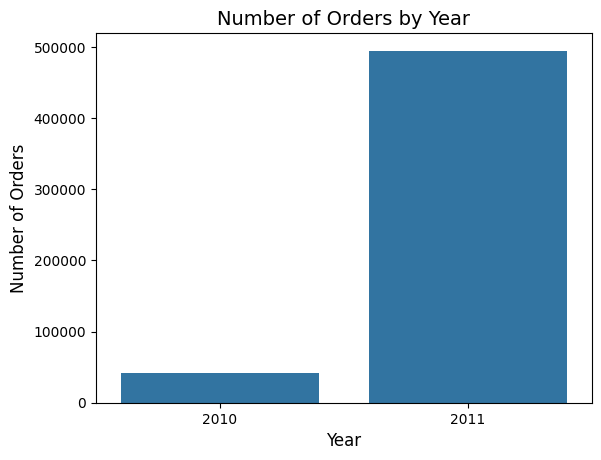

In [ ]:
sns.countplot(x = df['Year'])
plt.title('Number of Orders by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.savefig('Yearly_order.png', bbox_inches='tight')
plt.show()

Insights:
- **Significant growth** in the number of orders from **2010** to **2011**.
- Orders in 2011 are **almost 5 times** higher, indicating rapid business expansion or increased customer demand during that period.

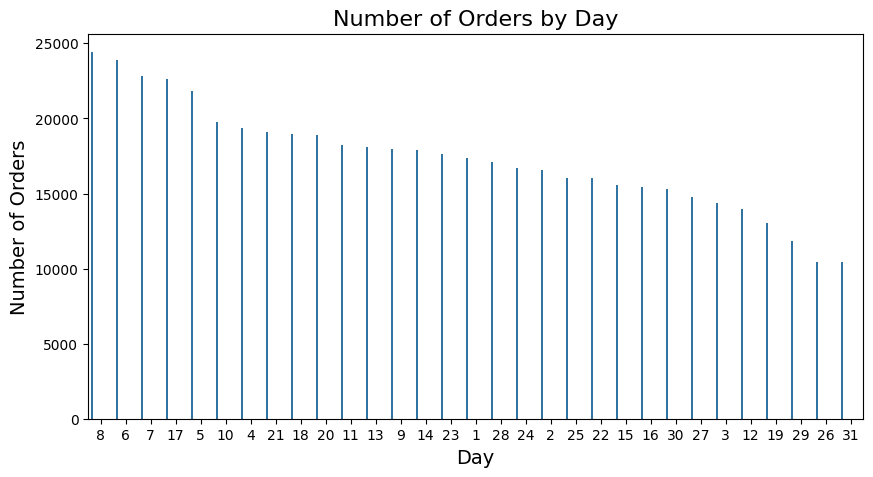

In [ ]:
plt.figure(figsize = (10,5))

ordered_day = df['Day'].value_counts(ascending = False).index
ax = sns.countplot(x = df['Day'], order = ordered_day)

for patch in ax.patches:
    patch.set_width(0.1)  # Adjust this value to make the bars thinner or thicker

plt.title('Number of Orders by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.savefig('number_of_orders_by_day.png', bbox_inches='tight')
plt.show()


#### Number of Orders by Day Insights :
- **Busy Early Days:** The 8th and 6th days of the month have the most orders, around **24,000**.
- **Gradual Decline:** As the days progress, the number of orders steadily declines.
- **End-of-Month Drop:** The lowest number of orders occurs on the last few days of the month (29th-31st), likely due to budgeting or pay cycle patterns.

# Bivariate Analysis

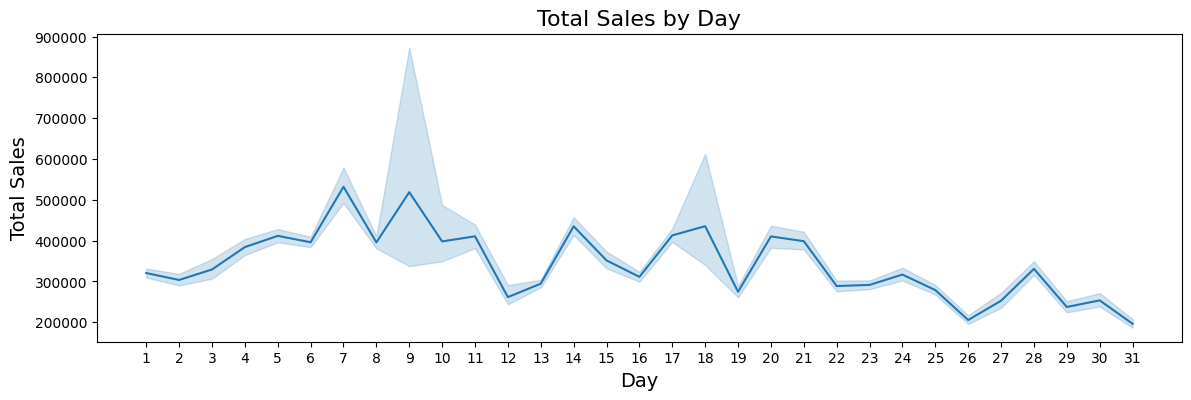

In [ ]:
plt.figure(figsize = (14,4))
sns.lineplot(x=df['Day'], y=df['TotalRevenue'], estimator='sum')
plt.title('Total Sales by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
plt.show()

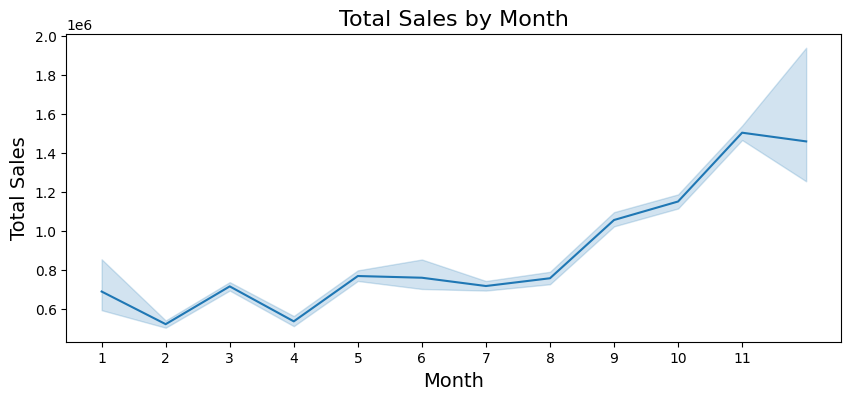

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(x=df['Month'], y=df['TotalRevenue'], estimator='sum')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(1, 12), labels=range(1, 12))
plt.show()


# RFM Analysis (Recency, Frequency, Monetary)


In [ ]:
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalRevenue': 'sum'  # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


# Customer Segmentation using RFM Scores


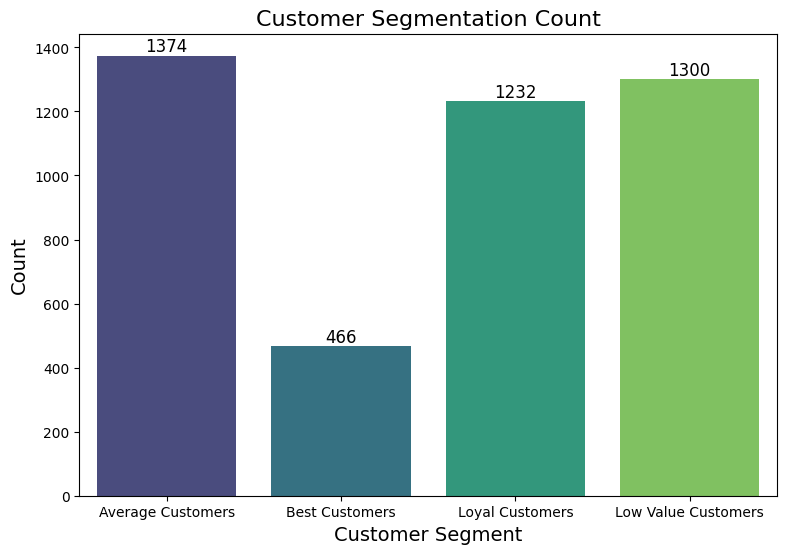

In [ ]:
plt.figure(figsize = (9,6))
# Create RFM score
rfm['RFM_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int) + \
                   pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4]).astype(int) + \
                   pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Segment customers
def rfm_segment(x):
    if x == 12:
        return 'Best Customers'
    elif x >= 9:
        return 'Loyal Customers'
    elif x >= 6:
        return 'Average Customers'
    else:
        return 'Low Value Customers'

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(rfm_segment)

rfm['Customer_Segment'].value_counts().reset_index()

ax = sns.countplot(x = rfm['Customer_Segment'], palette='viridis')
for patch in ax.patches:
    width = patch.get_width()
    x = patch.get_x() + width / 2
    y = patch.get_height()
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=12)

plt.title('Customer Segmentation Count', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.savefig('customer_segmentation_count.png', bbox_inches='tight')

plt.show()

### Customer Segmentation Insights:

1. **Average Customers (1374)**:
   - This segment represents the bulk of your customer base. These are customers with average engagement and spending patterns, contributing moderately to the business.
  
2. **Best Customers (466)**:
   - A **small but highly valuable** group. These customers are the most loyal, with high spending, and likely to generate the most revenue. Focused efforts to retain and reward this group can maximize long-term value.

3. **Loyal Customers (1232)**:
   - This segment indicates customers who consistently return. They may not spend as much as the "Best Customers," but their repeat purchases add stability and predictability to revenue streams. Building stronger relationships with this group can elevate them to "Best Customers."

4. **Low Value Customers (1300)**:
   - Although sizable, this group contributes the least to revenue. They may make infrequent or small purchases. Efforts like targeted promotions or re-engagement campaigns could help improve their value or transition them to higher segments.

# Additional Customer-Centric Features


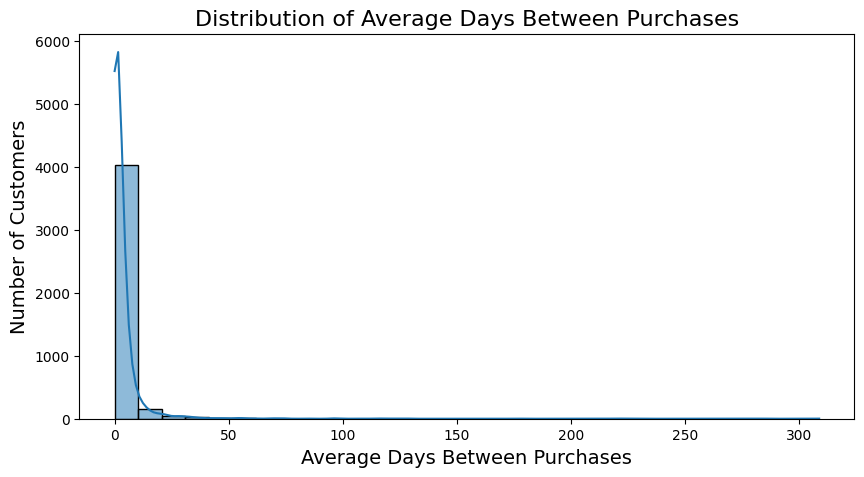

In [ ]:
# Average days between purchases
df['PrevPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].shift(1)
df['DaysBetweenPurchases'] = (df['InvoiceDate'] - df['PrevPurchaseDate']).dt.days

# Average days between purchases per customer
avg_days = df.groupby('CustomerID')['DaysBetweenPurchases'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(avg_days, bins=30, kde=True)

# Set plot title and labels
plt.title('Distribution of Average Days Between Purchases', fontsize=16)
plt.xlabel('Average Days Between Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

plt.savefig('Avg Days Distribution.png', bbox_inches='tight')

# Display the plot
plt.show()

#### Distribution of Average Days Between Purchases Insights :

- **Highly Frequent Purchases:** A significant number of customers tend to make purchases within a short period, as the distribution is heavily skewed to the left (0-5 days).
- **Long-Tail Distribution:** There is a long tail, meaning a few customers have a large gap between purchases (up to **300+ days**), but these instances are rare.
- **Key Observation:** The majority of customers seem to return within **0-10 days** for their next purchase, indicating frequent repeat buyers.

> Add blockquote



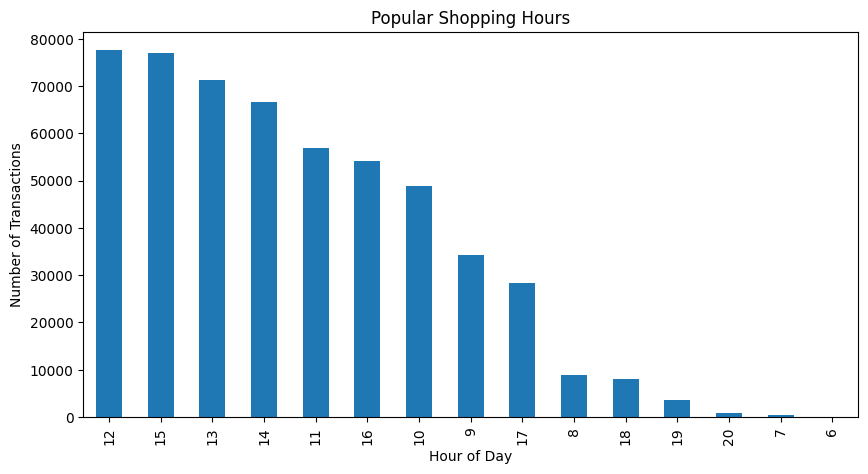

In [ ]:
# Most popular shopping hour
df['Hour'] = df['InvoiceDate'].dt.hour
popular_hours = df['Hour'].value_counts()

# Plot popular shopping hours
popular_hours.plot(kind='bar', figsize=(10,5))
plt.title('Popular Shopping Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

plt.savefig('Popular Shopping Hours.png', bbox_inches='tight')

plt.show()


#### Popular Shopping Hours Insights :
- **Peak Hours:** The highest number of transactions happen between **12 PM to 3 PM**, with the most transactions occurring around **12 PM** and **1 PM**.
- **Late Afternoon Decline:** After 3 PM, there's a noticeable decline in transactions, especially after **4 PM**, which continues through the rest of the day.
- **Low Activity Hours:** Early morning (before 10 AM) and late evening (after 6 PM) see the least shopping activity, with very few transactions during these hours.

### Overall Insights and Recommendations:

#### 1. **Sales Performance**
- **Revenue Trends**: The data indicates a significant revenue increase in 2011 compared to 2010, suggesting strong growth potential. However, it’s crucial to analyze the reasons behind this growth to sustain it.
- **Outlier Detection**: The presence of outliers in the `Quantity`, `UnitPrice`, and `TotalSale` indicates potential anomalies or unique sales scenarios. Investigating these can help identify exceptional customer behaviors or issues in pricing strategies.

#### 2. **Customer Demographics**
- **Customer Base Composition**:
  - The data shows a wide range of unique products and high sales volume predominantly from the **United Kingdom**. Focusing on this market for tailored promotions can enhance customer engagement.
  - The average number of customers is substantial, but segments indicate a disparity in value contribution. The segment of **Best Customers** is relatively small but valuable, while **Low Value Customers** constitute a significant portion.

#### 3. **Customer Segmentation**
- **Segmentation Analysis**:
  - The segmentation highlights opportunities for targeted marketing strategies. **Best Customers** should be rewarded and engaged further, while **Loyal Customers** can be incentivized to increase their spending.
  - **Low Value Customers** represent an opportunity for growth. Implementing strategies to re-engage them could potentially elevate their value.

#### 4. Popular Shopping Hours & Distribution of Average Days Between Purchases
- **Peak Shopping Hours:** Most transactions occur between **12 PM and 3 PM**, with significantly fewer transactions outside of these hours.
- **Frequent Repeat Purchases:** Many customers return to shop within **0-10 days** after their last purchase, with very few customers having large gaps between purchases.
  
#### 5. Number of Orders by Month & Day
- **November Peak:** The highest number of orders are placed in **November**, likely due to holiday shopping.
- **Daywise Ordering Trends:** The first half of the month, particularly the **6th to 8th**, sees more activity, while the end of the month sees a decline in orders.
- **Seasonal Drop:** February and April are the slowest months for orders.

### Recommendations:

1. **Enhance Customer Loyalty Programs**:
   - Develop programs that reward **Best** and **Loyal Customers** to enhance retention and encourage higher spending.
   
2. **Targeted Marketing Campaigns**:
   - Create tailored campaigns for **Low Value Customers** with incentives to increase purchase frequency and average transaction value.

3. **Analyze and Mitigate Outliers**:
   - Conduct a thorough analysis of outliers in the sales data to understand their impact and potentially replicate successful strategies used in those transactions.

4. **Diversification Strategy**:
   - Since a significant portion of revenue comes from the UK, consider diversifying into other markets by analyzing purchasing trends in countries with lower revenue but potential customer bases.

5. **Ongoing Monitoring**:
   - Implement a regular review process to monitor customer behavior and sales trends, allowing for timely adjustments to strategies as market conditions change.

6. **Target Peak Shopping Hours:**
   - **Increase promotions** and special offers during **12 PM to 3 PM** to capture high traffic.
   - **Offer incentives** during off-peak hours (early morning or late evening) to distribute shopping activity more evenly throughout the day.

7. **Leverage Repeat Purchase Behavior:**
   - Implement a **customer loyalty program** to reward frequent buyers, as the data shows a high volume of customers returning within **10 days**.
   - Send **targeted reminders or follow-up promotions** to encourage repeat purchases within the first 5-10 days of a customer's last order.

8. **Holiday and Seasonal Promotions:**
   - **November** is the highest-performing month; capitalize on this by launching **holiday-specific campaigns** and offering early-bird deals starting in October.
   - During slower months (e.g., February and April), offer **seasonal discounts** or clearance sales to maintain steady order flow.

9. **Early-Month Promotions:**
   - Since the **6th to 8th days** of the month are particularly busy, align major product launches or promotions to these dates.
   - Offer **end-of-month deals** to stimulate purchases during the typically slower period of the **29th-31st**.

### Conclusion:
- By focusing on customer segmentation and targeted marketing strategies, the business can enhance customer value, improve retention, and foster sustainable growth in revenue.
- To maximize sales, focus on promotions during **peak shopping hours (12 PM - 3 PM)** and encourage repeat purchases by targeting customers within **10 days** of their last order. Leverage **holiday season campaigns** in **November**, and boost activity during slower months like **February** with discounts. Align major promotions with the **6th-8th days of each month** while addressing the drop-off at the end of the month with special offers.






